In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset link: https://www.kaggle.com/nitinchoudhary012/engineering-graduate-salary-prediction
salary = pd.read_csv("Engineering_graduate_salary.csv")
salary.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


See for any null values in the dataset using .info() also, we have to check for any outliers using .describe()


In [2]:
print(salary.info())

# Checking for outliers
print(salary.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [3]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [4]:
draw_missing_data_table(salary)

,Total,Percent
Salary,0,0.0
CollegeID,0,0.0
CollegeCityTier,0,0.0
CollegeCityID,0,0.0
collegeGPA,0,0.0
Specialization,0,0.0
Degree,0,0.0
CollegeTier,0,0.0
12board,0,0.0
openess_to_experience,0,0.0


In [5]:
salary.shape

(2998, 34)

In [6]:
salary.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [7]:
# dropping features which do not make any sense to predict salary
salary.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState', 'CollegeCityTier',"DOB","Gender","GraduationYear","CollegeTier"], axis = 1, inplace = True)

In [8]:
salary.shape

(2998, 22)

In [9]:
# replace -1 and then fill missing values
salary.replace(-1, np.NaN,inplace=True)

In [10]:
# lets check the missing values again
salary.isnull().sum()

10percentage                0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
English                     0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
MechanicalEngg           2811
ElectricalEngg           2876
TelecomEngg              2724
CivilEngg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Salary                      0
dtype: int64

In [11]:
# list of columns with null values 
missing_values_columns = [col for col in salary.columns if salary.isnull().sum()[col] > 0]

In [12]:
# function for missing values substitution
def fill_missing_values(df,missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
     
    return data

# lets use this function to fill the missing values
salary = fill_missing_values(salary,missing_values_columns)

Exploratory Data Analysis

Correlation Analysis

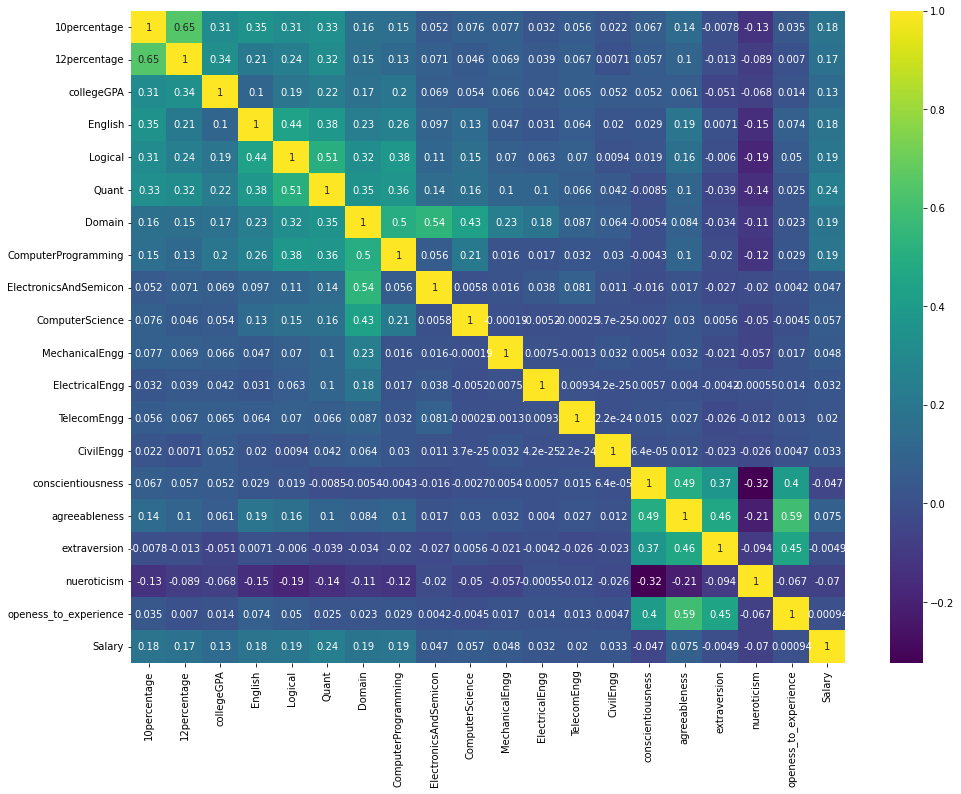

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(salary.corr(),annot=True,cmap='viridis')
plt.show()

Analysis of Variable Salary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


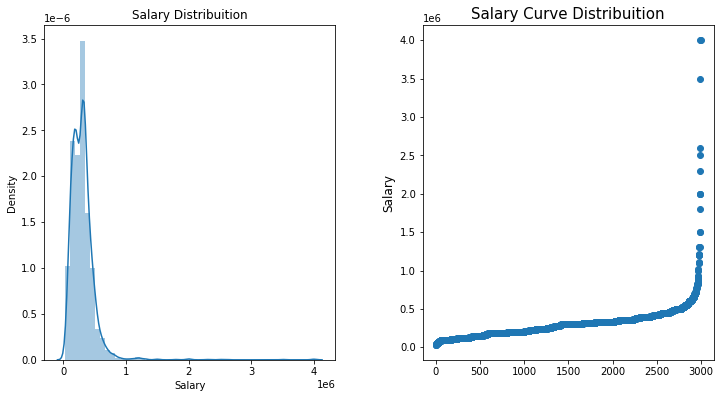

In [14]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(salary['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(salary.shape[0]), np.sort(salary.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

Most of the graduates having salaries under 10 lakhs.
Long tail of distribution is longer on right hand side as compared to left hand side which shows that distribution is positively skewed.

In [15]:
# checking the count of unique specialization present in dataframe
salary.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

In [16]:
# create the copy of dataframe
data = salary.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var
    
# apply the function to specialization to get the results    
salary['Specialization'] = salary.Specialization.apply(map_to_other_specialization)

In [17]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
salary['Specialization'] = salary['Specialization'].str.replace('electronics & instrumentation eng','electronics and instrumentation engineering')

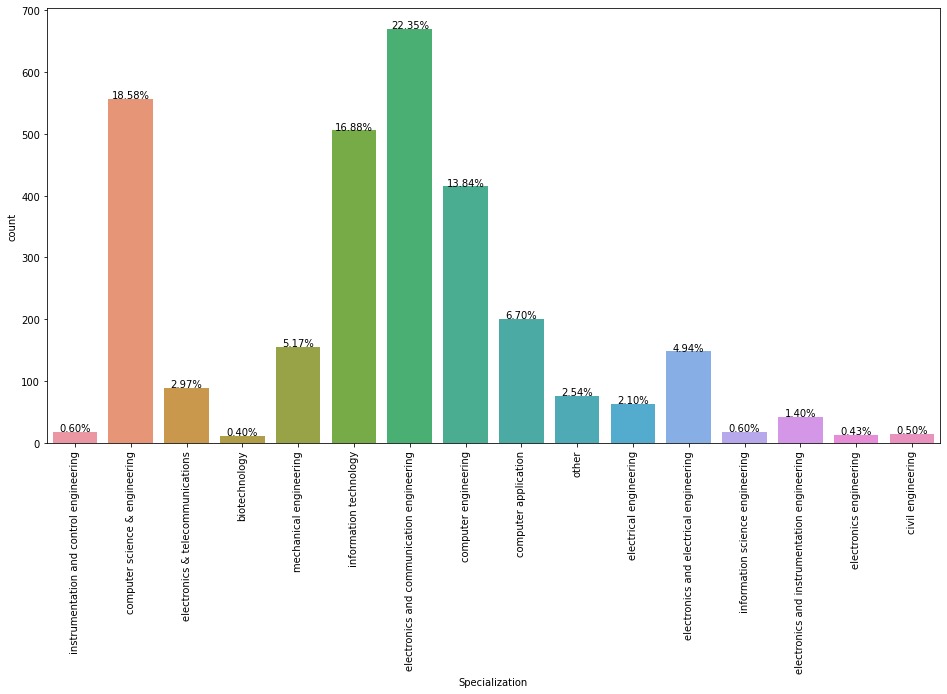

In [18]:
# count plot of unique categories in specialization 
plt.figure(figsize = (16, 8))
total = float(len(salary))
ax = sns.countplot(x='Specialization',data=salary)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.xticks(rotation = 90)
plt.show()

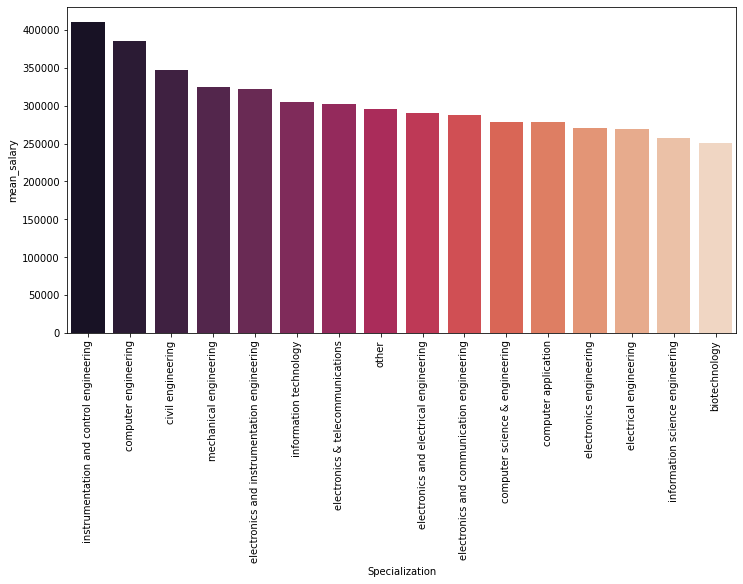

In [19]:
# average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = salary.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

In [20]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in salary.columns if salary.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in salary.columns if (salary.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


Categorical Features are :  ['Degree', 'Specialization']


In [21]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col])
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)
        
        # dropping original coolumns for which encoding is applied.
        df.drop(col, axis=1,inplace=True)
    return df

In [22]:
salary = onehot_encoder(salary,categorical_columns)

In [23]:
# lets drop one column from each encoded categorical feature to avoid dummy trap 
salary.drop(['M.Sc. (Tech.)','biotechnology'],axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['10percentage', '12percentage', 'collegeGPA', 'English','Logical','Quant','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Salary']
salary[num_vars] = scaler.fit_transform(salary[num_vars])

salary

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
0,0.818115,0.749574,0.720150,0.676259,0.783333,0.884615,0.694479,0.543634,0.486430,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1590,0.3789,1.2396,0.14590,0.2889,0.103405,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.255661,0.417376,0.625616,0.374101,0.400000,0.115385,0.342315,0.371960,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.1336,0.0459,1.2396,0.52620,-0.2859,0.018916,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.626917,0.769506,0.592819,0.438849,0.466667,0.493590,0.824666,0.492924,0.557411,0.410137,0.501189,0.478714,0.250000,0.517388,0.5100,-0.1232,1.5428,-0.29020,-0.2875,0.055485,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.754200,0.783646,0.790675,0.712230,0.708333,0.660256,0.990009,0.786838,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.4463,0.2124,0.3174,0.27270,0.4805,0.097100,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.712199,0.596252,0.618114,0.568345,0.500000,0.314103,0.278457,0.300429,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-1.4992,-0.7473,-1.0697,0.06223,0.1864,0.041614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.584368,0.562181,0.679207,0.467626,0.483333,0.416667,0.538387,0.200286,0.417537,0.410137,0.501189,0.478714,0.484061,0.517388,-1.1901,0.9688,-1.0697,1.35490,0.0284,0.021438,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2994,0.748722,0.630324,0.734941,0.237410,0.650000,0.352564,0.190153,0.300429,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1082,0.0328,-0.4891,-0.29020,0.5024,0.021438,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2995,0.883857,0.435434,0.713398,0.294964,0.383333,0.467949,0.600057,0.472103,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.8810,0.1888,-0.3440,0.06230,0.6603,0.088272,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2996,0.833455,0.428620,0.730761,0.410072,0.750000,0.493590,0.901490,0.629471,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.4374,1.2808,-0.4891,-1.46537,0.5419,0.124842,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
salary.head(15)

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
0,0.818115,0.749574,0.720150,0.676259,0.783333,0.884615,0.694479,0.543634,0.486430,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1590,0.3789,1.2396,0.14590,0.2889,0.103405,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.255661,0.417376,0.625616,0.374101,0.400000,0.115385,0.342315,0.371960,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.1336,0.0459,1.2396,0.52620,-0.2859,0.018916,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.626917,0.769506,0.592819,0.438849,0.466667,0.493590,0.824666,0.492924,0.557411,0.410137,0.501189,0.478714,0.250000,0.517388,0.5100,-0.1232,1.5428,-0.29020,-0.2875,0.055485,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.754200,0.783646,0.790675,0.712230,0.708333,0.660256,0.990009,0.786838,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.4463,0.2124,0.3174,0.27270,0.4805,0.097100,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.712199,0.596252,0.618114,0.568345,0.500000,0.314103,0.278457,0.300429,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-1.4992,-0.7473,-1.0697,0.06223,0.1864,0.041614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.733382,0.630324,1.000000,0.510791,0.666667,0.641026,0.376060,0.500715,0.348643,0.410137,0.501189,0.478714,0.388021,0.517388,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,0.102144,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.538714,0.224872,0.657771,0.474820,0.500000,0.365385,0.829585,0.492924,0.423763,0.410137,0.652370,0.478714,0.484061,0.517388,0.1282,-0.4536,0.3174,0.90660,-0.0943,0.029004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0.620891,0.817717,0.689925,0.273381,0.458333,0.205128,0.704090,0.515021,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,0.1282,0.5454,0.4711,0.90660,-0.2859,0.017654,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0.617239,0.812606,0.712969,0.474820,0.600000,0.410256,0.744758,0.600858,0.423763,0.470363,0.501189,0.478714,0.484061,0.517388,-0.1590,-0.4536,0.1637,0.52620,-0.0943,0.040353,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0.255661,0.562181,0.680064,0.460432,0.358333,0.564103,0.622643,0.400572,0.423763,0.411090,0.501189,0.478714,0.484061,0.517388,-0.7335,-0.4536,-0.2974,1.41360,0.6721,0.041614,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Create dummy variables of Degree, Gender and Specialization

# dg = pd.get_dummies(salary['Degree'])

# # Adding the sp to the original salary dataframe
# salary = pd.concat([salary, dg], axis = 1)

# # Dropping 'Degree' as we have created the dummies for it
# salary.drop(['Degree'], axis = 1, inplace = True)

# gd = pd.get_dummies(salary['Gender'])

# # Adding the gd to the original salary dataframe
# salary = pd.concat([salary, gd], axis = 1)

# # Dropping 'Gender' as we have created the dummies for it
# salary.drop(['Gender'], axis = 1, inplace = True)


# sp = pd.get_dummies(salary['Specialization'])

# # Adding the sp to the original salary dataframe
# salary = pd.concat([salary, sp], axis = 1)

# # Dropping 'Specialization' as we have created the dummies for it
# salary.drop(['Specialization'], axis = 1, inplace = True)

salary.head()


,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
0,0.818115,0.749574,0.720150,0.676259,0.783333,0.884615,0.694479,0.543634,0.486430,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1590,0.3789,1.2396,0.14590,0.2889,0.103405,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.255661,0.417376,0.625616,0.374101,0.400000,0.115385,0.342315,0.371960,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.1336,0.0459,1.2396,0.52620,-0.2859,0.018916,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.626917,0.769506,0.592819,0.438849,0.466667,0.493590,0.824666,0.492924,0.557411,0.410137,0.501189,0.478714,0.250000,0.517388,0.5100,-0.1232,1.5428,-0.29020,-0.2875,0.055485,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.754200,0.783646,0.790675,0.712230,0.708333,0.660256,0.990009,0.786838,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.4463,0.2124,0.3174,0.27270,0.4805,0.097100,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.712199,0.596252,0.618114,0.568345,0.500000,0.314103,0.278457,0.300429,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-1.4992,-0.7473,-1.0697,0.06223,0.1864,0.041614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting the Data into two different sets

In [27]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(salary, train_size = 0.7, test_size = 0.3, random_state = 100)


In [28]:
df_train.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
150,0.675676,0.834753,0.593462,0.208633,0.558333,0.365385,0.356536,0.243205,0.423763,0.294455,0.501189,0.478714,0.484061,0.517388,0.9900,0.3789,-0.2974,-1.1218,-1.2440,0.027743,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
91,0.529584,0.340716,0.604180,0.374101,0.175000,0.211538,0.604241,0.492924,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.8517,0.8784,1.5470,-0.2344,0.4805,0.065574,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2500,0.602630,0.749574,0.614898,0.523741,0.566667,0.467949,0.413838,0.400572,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1082,0.9688,-0.7794,1.3549,1.2923,0.123581,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2751,0.763331,0.701874,0.719936,0.352518,0.616667,0.570513,0.376060,0.492924,0.348643,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1082,-0.5523,-1.3599,-0.7603,-0.4455,0.073140,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2422,0.706172,0.494037,0.884995,0.395683,0.766667,0.608974,0.538387,0.492924,0.417537,0.410137,0.501189,0.478714,0.484061,0.517388,-0.4173,0.6568,0.5269,0.8848,-0.1295,0.095839,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
# Dividing the training data set into X and Y
y_train = df_train.pop('Salary')
X_train = df_train

In [30]:
X_train.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
150,0.675676,0.834753,0.593462,0.208633,0.558333,0.365385,0.356536,0.243205,0.423763,0.294455,0.501189,0.478714,0.484061,0.517388,0.9900,0.3789,-0.2974,-1.1218,-1.2440,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
91,0.529584,0.340716,0.604180,0.374101,0.175000,0.211538,0.604241,0.492924,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,1.8517,0.8784,1.5470,-0.2344,0.4805,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2500,0.602630,0.749574,0.614898,0.523741,0.566667,0.467949,0.413838,0.400572,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1082,0.9688,-0.7794,1.3549,1.2923,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2751,0.763331,0.701874,0.719936,0.352518,0.616667,0.570513,0.376060,0.492924,0.348643,0.410137,0.501189,0.478714,0.484061,0.517388,-0.1082,-0.5523,-1.3599,-0.7603,-0.4455,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2422,0.706172,0.494037,0.884995,0.395683,0.766667,0.608974,0.538387,0.492924,0.417537,0.410137,0.501189,0.478714,0.484061,0.517388,-0.4173,0.6568,0.5269,0.8848,-0.1295,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


We’ll add the variables except for the target variable to the model

In [31]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

# lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# lr_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     7.905
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           2.15e-37
Time:                        01:54:06   Log-Likelihood:                 3253.4
No. Observations:                2098   AIC:                            -6433.
Df Residuals:                    2061   BIC:                            -6224.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.0310      0.068      0.457      0.648      -0.102       0.164
10percentage                                    0.0088      0.009      0.997      0.319      -0.008       0.026
12percentage                                    0.0157      0.008      1.907      0.057      -0.000       0.032
collegeGPA                                      0.0199      0.015      1.328      0.184      -0.009       0.049
English                                         0.0229      0.009      2.569      0.010       0.005       0.040
Logical                                         0.0070      0.010      0.704      0.481      -0.013       0.027
Quant                                           0.0448      0.009      4.872      0.000       0.027       0.063
Domain                                          0.0227      0.008      2.824      0.005       0.007       0.039
ComputerProgramming                             0.0043      0.013      0.342      0.733      -0.020       0.029
ElectronicsAndSemicon                          -0.0229      0.017     -1.320      0.187      -0.057       0.011
ComputerScience                                -0.0188      0.017     -1.107      0.268      -0.052       0.015
MechanicalEngg                                 -0.0096      0.027     -0.360      0.719      -0.062       0.043
ElectricalEngg                                 -0.0123      0.027     -0.459      0.646      -0.065       0.040
TelecomEngg                                    -0.0078      0.019     -0.418      0.676      -0.044       0.029
CivilEngg                                       0.0428      0.051      0.839      0.402      -0.057       0.143
conscientiousness                              -0.0051      0.001     -3.707      0.000      -0.008      -0.002
agreeableness                                   0.0045      0.002      2.652      0.008       0.001       0.008
extraversion                                    0.0025      0.001      1.782      0.075      -0.000       0.005
nueroticism                                    -0.0029      0.001     -2.386      0.017      -0.005      -0.001
openess_to_experience                          -0.0022      0.001     -1.525      0.127      -0.005       0.001
B.Tech/B.E.                                    -0.0527      0.053     -1.000      0.317      -0.156       0.051
M.Tech./M.E.                                   -0.0544      0.054     -1.014      0.311      -0.160       0.051
MCA                                            -0.0164      0.028     -0.592      0.554      -0.071       0.038
civil engineering                               0.0324      0.022      1.464      0.143      -0.011       0.076
computer application                           -0.0164     

We have to see the multicollinearity between the variables. We do that by calculating the VIF value.
Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for VIF is:
VIF = 1/(1-Ri²)

We consider the variables generally having a value <5.

Drop variables having high p and high VIF.

repeat this process till every column’s p-value is <0.005 and VIF is <5
(optional here)

We will not drop Engineering Specializations here.

In [33]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,computer application,inf
21,MCA,inf
19,B.Tech/B.E.,780.42
13,CivilEngg,456.58
10,MechanicalEngg,130.24
11,ElectricalEngg,122.47
2,collegeGPA,84.01
12,TelecomEngg,63.43
28,electronics and communication engineering,46.67
8,ElectronicsAndSemicon,41.62


In [34]:
X_train.pop("10percentage")

150     0.675676
91      0.529584
2500    0.602630
2751    0.763331
2422    0.706172
          ...   
1930    0.401753
79      0.279949
1859    0.900292
2840    0.401753
1544    0.456538
Name: 10percentage, Length: 2098, dtype: float64

In [35]:
X_train_lm = sm.add_constant(X_train)

# lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# lr_1.summary()

In [36]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
20,MCA,inf
22,computer application,inf
18,B.Tech/B.E.,780.40
12,CivilEngg,456.45
9,MechanicalEngg,130.12
10,ElectricalEngg,122.44
1,collegeGPA,81.96
11,TelecomEngg,63.42
27,electronics and communication engineering,46.67
7,ElectronicsAndSemicon,41.59


In [37]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     8.102
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.16e-37
Time:                        01:54:07   Log-Likelihood:                 3252.9
No. Observations:                2098   AIC:                            -6434.
Df Residuals:                    2062   BIC:                            -6231.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Before making predictions, we have to see whether the error terms are normally distributed or not. We’ll do that by using Residual Analysis.
Error-terms = y_actual - y_predicted
The difference between the actual y-value and the predicted y-value using the model at that particular x-value is the error term.

Residual Analysis of the train data
We have to check if the error terms are normally distributed (which is one of the major assumptions of linear regression); let us plot the error terms’ histogram.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

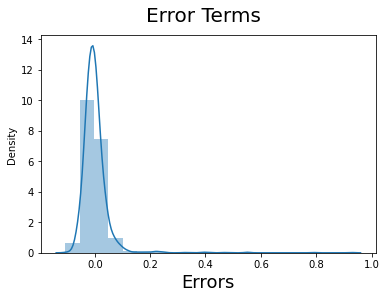

In [38]:
y_train_salary = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_salary), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As we can see, the error terms resemble closely to a normal distribution. So we can move ahead and make predictions using the model in the test dataset.

We have to scale the test data.

In [39]:
# Dividing the training data set into X and Y
y_test = df_test.pop('Salary')
X_test = df_test

In [40]:
X_test.pop("10percentage")

1271    0.328707
699     0.858473
356     0.847699
2776    0.792549
561     0.496713
          ...   
931     0.410884
2847    0.474799
1629    0.730460
2071    0.712199
1054    0.726808
Name: 10percentage, Length: 900, dtype: float64

In [41]:
X_test.head()

,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,B.Tech/B.E.,M.Tech./M.E.,MCA,civil engineering,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
1271,0.221465,0.668489,0.251799,0.200000,0.403846,0.600057,0.472103,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.2628,-1.3713,0.0914,0.1798,0.5024,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
699,0.729642,0.743516,0.410072,0.291667,0.423077,0.842248,0.486409,0.423763,0.529637,0.501189,0.478714,0.484061,0.517388,1.7081,0.7119,0.3174,-0.9950,0.2889,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
356,0.701874,0.692712,0.676259,0.600000,0.750000,0.819417,0.572246,0.423763,0.410137,0.501189,0.478714,0.484061,0.517388,-0.8772,0.2124,-1.5270,0.1459,-1.2440,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2776,0.729131,0.679207,0.589928,0.508333,0.525641,0.649390,0.343348,0.465553,0.410137,0.501189,0.478714,0.484061,0.517388,0.8463,0.7119,0.9322,-0.3612,1.2470,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
561,0.398637,0.635048,0.410072,0.583333,0.346154,0.207392,0.492924,0.265136,0.410137,0.501189,0.478714,0.416667,0.517388,1.2772,1.0449,1.7007,0.5262,0.6721,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)


# Making predictions using the final model
y_pred = lr_1.predict(X_test)

Now, we have to see if the final predicted model is best fitted or not. To do that, we’ll calculate the R² value for the expected test model.
We do that by importing the r2_score library from sklearn

In [43]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.11860178934643406

In [44]:
# Adding constant variable to train dataframe
X_train = sm.add_constant(X_train)


# Making predictions using the final model
y_pred_train = lr_1.predict(X_train)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_true = y_train, y_pred = y_pred_train)

0.12090024850401881

Since the R² values for both the train and test data are almost equal, the model we built is the best-fitted model.

For the trained model, R² calculated again to compare the results,
else the R² value for trained model can also be seen in the Model Summary.

In [46]:
import sklearn.metrics as sm
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Explain variance score = 0.12
R2 score = 0.12


Trying LinearRegression and XGBoost Models using Libraries

trying XGBoost Model

In [47]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_r2 = xgb.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))

[01:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.16151


In [48]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

linear_reg_r2_score = linear_reg.score(X_test, y_test)

print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))

Linear Regression R^2 Score: 0.1186
